# 分类问题——银行销售目标客户的确定

## 0.数据集说明：
### 采用UCI机器学习数据集中的Bank Marketing Data Set
（链接：https://archive.ics.uci.edu/ml/datasets/Bank+Marketing）

通常来说，银行机构的客服人员至少需要联系一次客户来得知客户是否将认购银行的产品（定期存款）。<br>
与该数据集对应的任务是分类任务，而分类目标是预测客户是(yes)否(no)认购定期存款（变量y）。

数据集中包含四个CSV文件，其中有：<br>
1.bank.csv - 从bank-full中选出的10%的样例（4521个）<br>
2.bank-full.csv - 完整样例（45211个），16个特征。（老版本）<br>
3.bank-additional.csv - 从bank-additional-full中选出的10%的样例（4119个）<br>
4.bank-additional-full.csv - 完整样例（41188个），20个特征<br>
<br>
<B>这里我们使用3、4数据集<B/>

## 1.数据分析 

20个输入特征：年龄、职务、婚姻情况、教育水平、违约记录、住房、贷款、联系人、月、一周中的最后联系人、持续时间、广告活动、本次活动中联系的次数，最后一次接触距离上一次接触的时间，以前的活动中联系的次数，上一次活动成功与否，就业变化率，消费者物价指数，消费者信心指数，欧元银行同业拆借利率，就业人数。
<br><br>
输出变量（期望目标）：客户是否已经订阅定期存款？

### ①载入数据

In [214]:
import pandas as pd
input_data_path = "C:/bank-additional/bank-additional-full.csv"
data = pd.read_csv(input_data_path, sep=';')#以分号为间隔

In [184]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [185]:
#查看函数的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [186]:
#查看函数的基本信息
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### ②数据预处理

按照数据类型对特征进行简单分类（数值型特征，字符型特征） 其中字符型特征又分为：二分类特征，有序特征和无序特征

In [187]:
string_features = data.columns[data.dtypes  == "object"].to_series().values
int_features = data.columns[data.dtypes  == "int64"].to_series().values
float_features = data.columns[data.dtypes  == "float64"].to_series().values
numeric_features = np.append(int_features,float_features)

bin_features = ['default', 'housing', 'loan','y'] #二分类
order_features = ['education'] #有序
disorder_features = ['poutcome', 'job', 'marital', 'contact', 'month','day_of_week'] #无序

通过观察可以看到数值型变量是没有缺失的<br>
我们来看一下非数值型变量

In [188]:
for i in data.columns:
    if type(data[i][0]) is str:
        print('unknown value count in '+i+':\t'+str(data[data[i]=='unknown']['y'].count()))

unknown value count in job:	330
unknown value count in marital:	80
unknown value count in education:	1731
unknown value count in default:	8597
unknown value count in housing:	990
unknown value count in loan:	990
unknown value count in contact:	0
unknown value count in month:	0
unknown value count in day_of_week:	0
unknown value count in poutcome:	0
unknown value count in y:	0


可以看到是有缺失值的。对于缺失值的处理，我们常有以下方法：
<br>
1.删除这些变量是缺失值(unknown)的行；<br>
2.如果预计该变量对于学习模型效果影响不大，可以对unknown值赋众数，这里认为变量都对学习模型有较大影响，不采取此法；<br>
3.可以使用数据完整的行作为训练集，以此来预测缺失值。由于sklearn的模型只能处理数值变量，需要先将分类变量数值化，然后进行预测。<br>

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [258]:
data[data[feature].isnull()]['age'].count() 

0

In [262]:
Missing_features_dict = {}
Missing_features_name = []
    #先统计哪些列存在缺失的数据
for i in data.columns:
    Missing_count = data[data[i].isnull()]['age'].count() 
    if Missing_count > 0:
            # 统计包含缺失值的列
        Missing_features_dict.update({i: Missing_count})
    #对缺失的数据列按照缺失值数量从少到多排序，先拟合缺失值少的列        
Missing_features_name = sorted(Missing_features_dict.keys(),reverse=True) 

In [267]:
data[data['education'].isnull()]['age'].count() 

1731

缺失值填充方法：平均值填充，随机森林填充

In [189]:
#使用均值填补缺失值
def Missing_value_perprocessing_mean (bank_data):
    col  = bank_data.columns
    #Train_copy = Train.copy()
    #直接使用平均值填补缺失值
    from sklearn.preprocessing import Imputer
    imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
    imp.fit(bank_data)
    bank_data = imp.transform(bank_data) 
    bank_data = pd.DataFrame(bank_data,columns = col)
    return bank_data 

#使用随机森林填补缺失值
def Missing_value_perprocessing_rf (bank_data):
    Missing_features_dict = {}
    Missing_features_name = []
    #先统计哪些列存在缺失的数据
    for i in bank_data.columns:
        Missing_count = bank_data[bank_data[i].isnull()]['age'].count() 
        if Missing_count > 0:
            # 统计包含缺失值的列
            Missing_features_dict.update({i: Missing_count})
    #对缺失的数据列按照缺失值数量从少到多排序，先拟合缺失值少的列        
    Missing_features_name = sorted(Missing_features_dict.keys(),reverse=True) 
    #print(Missing_features_name)
    for i in Missing_features_name:     
        #有缺失值的数据
        train_miss_data = bank_data[bank_data[i].isnull()]
        train_miss_data_X = train_miss_data.drop(Missing_features_name, axis=1)
        #没有缺失值的数据
        train_full_data = bank_data[bank_data[i].notnull()]     
        train_full_data_Y = train_full_data[i]
        train_full_data_X = train_full_data.drop(Missing_features_name, axis=1)

        from sklearn.ensemble import RandomForestClassifier
        #使用随机森林拟合        
        rf = RandomForestClassifier(n_estimators=100)
        #利用训练集中没有缺失值的数据构建随机森林
        rf.fit(train_full_data_X, train_full_data_Y)
        #预测训练集中的缺失值
        train_miss_data_Y = rf.predict(train_miss_data_X)
        train_miss_data[feature] = train_miss_data_Y
        #将补充完整的
        bank_data_small_train = pd.concat([train_full_data, train_miss_data])        
    return bank_data_small_train

使用填充方法需要将非数值型变量进行编码

把二分类特征转化成（1，0）

In [215]:
#处理二分类的特征
for feature in bin_features:      
        new = np.zeros(data[feature].shape[0])
        for rol in range(data[feature].shape[0]):
            if data[feature][rol] == 'yes' :
                new[rol] = 1
            elif data[feature][rol]  == 'no':
                new[rol] = 0
            else:
                new[rol] = None
        data[feature] =  new

In [191]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


把有序特征转化为序列（1，2，……，n）

In [216]:
#特征值有次序关系的特征，按照特征值强弱排序（如：受教育程度）
education_values = ["illiterate", "basic.4y", "basic.6y", "basic.9y", 
    "high.school",  "professional.course", "university.degree","unknown"]
replace_values = list(range(1,  len(education_values)))
replace_values.append(None)
#除了replace也可以用map()
data[order_features] = data[order_features].replace(education_values,replace_values)
data[order_features] = data[order_features].astype("float")

In [193]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,5.0,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,5.0,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,3.0,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,5.0,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


对无序特征进行catcode编码

In [223]:

def disorder_features_perprocessing (disorder_features, data):
    for col in disorder_features:
        if data[col].dtype==object:
               data[col]=data[col].astype('category')
               data[col]=data[col].cat.codes
    return data

In [224]:
disorder_features_perprocessing (disorder_features, data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7,1,5.0,NaN,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7,1,5.0,0.0,1.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0,1,3.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7,1,5.0,0.0,0.0,1.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6.0,0.0,1.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,1,1,6.0,0.0,0.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,5,1,7.0,0.0,1.0,0.0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,9,1,6.0,0.0,0.0,0.0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [225]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,7,1,5.0,NaN,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7,1,5.0,0.0,1.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0,1,3.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7,1,5.0,0.0,0.0,1.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0


全部编码完以后，填充缺失值

In [285]:
#Missing_value_perprocessing
#平均值
a_data = Missing_value_perprocessing_mean(data)
#随机森林
data = Missing_value_perprocessing_rf(data) 

D:\University\anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\University\anaconda\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [204]:
a_data.head()

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56.0,2.0,0.000000,0.0,0.0,261.0,1.0,999.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57.0,5.0,0.000092,0.0,0.0,149.0,1.0,999.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.0,5.0,0.000000,1.0,0.0,226.0,1.0,999.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,3.0,0.000000,0.0,0.0,151.0,1.0,999.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56.0,5.0,0.000000,0.0,1.0,307.0,1.0,999.0,0.0,1.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [279]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7,1,5.0,0.0,1.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0,1,3.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7,1,5.0,0.0,0.0,1.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
6,59,0,1,6.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0


In [286]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,7,1,5.0,0.0,1.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,0,1,3.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,7,1,5.0,0.0,0.0,1.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
6,59,0,1,6.0,0.0,0.0,0.0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16841,53,1,1,2.0,0.0,0.0,0.0,1,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0.0
19678,48,1,1,4.0,0.0,1.0,0.0,0,1,2,...,3,999,0,1,1.4,93.444,-36.1,4.968,5228.1,0.0
21148,46,7,1,5.0,0.0,1.0,0.0,0,1,1,...,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0.0
21556,44,11,1,5.0,0.0,1.0,0.0,0,1,3,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0.0


In [287]:
data.to_csv('C:/Users/安雅沛/Desktop/1.csv') #把处理后的数据填入csv文件中

这里我们采用随机森林的结果

对于编码有另一种方式，就是直接使用cat.codes，但是用这个就没有考虑无序、有序甚至是缺失值的情况了。所以在此我们还是使用前面的方法。

In [38]:
#编码分类数据
#for col in data.columns:
#    if data[col].dtype==object:
#           data[col]=data[col].astype('category')
#           data[col]=data[col].cat.codes

In [39]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [288]:
# 数据归一化处理 -(0,1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
features_columns_df=data
array = features_columns_df.values
# separate array into input and output components
X = array[:,0:19]
Y = array[:,20]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.481 0.273 0.333 0.167 0.    0.    0.    1.    0.667 0.25  0.053 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957]
 [0.247 0.636 0.333 0.667 0.    1.    0.    1.    0.667 0.25  0.046 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957]
 [0.284 0.    0.333 0.333 0.    0.    0.    1.    0.667 0.25  0.031 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957]
 [0.481 0.636 0.333 0.667 0.    0.    1.    1.    0.667 0.25  0.062 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957]
 [0.519 0.    0.333 0.833 0.    0.    0.    1.    0.667 0.25  0.028 0.
  1.    0.    0.5   0.938 0.699 0.603 0.957]]


In [289]:
rescaledX

array([[0.481, 0.273, 0.333, ..., 0.699, 0.603, 0.957],
       [0.247, 0.636, 0.333, ..., 0.699, 0.603, 0.957],
       [0.284, 0.   , 0.333, ..., 0.699, 0.603, 0.957],
       ...,
       [0.358, 0.636, 0.333, ..., 0.484, 0.615, 0.981],
       [0.333, 1.   , 0.333, ..., 0.484, 0.615, 0.981],
       [0.481, 0.   , 0.333, ..., 0.484, 0.615, 0.982]])

## 2.预测是否订购

### ①Classify the model using RandomForestClassifier（随机森林）

In [295]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = features_columns_df.iloc[:,0:19]
Y = features_columns_df.iloc[:,20]
# 拆分数据集为训练集和测试集
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model = rf.fit(X_train, y_train)
# Find feature importance, print it
#raw_feature_importance = model.feature_importances_.tolist()
#feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
#print(zip(features_columns_df.columns, feature_importance))

D:\University\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [297]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.9103950562789671

In [298]:
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model.predict(X_test.astype('int'))
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     12096
         1.0       0.52      0.46      0.49      1497

    accuracy                           0.89     13593
   macro avg       0.73      0.70      0.72     13593
weighted avg       0.89      0.89      0.89     13593



1326.0

### ②Classify the model using XGBClassifier（Boosting算法）
使用前先安装<br>
pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple      -清华镜像网站

In [299]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split data into X and y
X = features_columns_df.iloc[:,0:19]
Y = features_columns_df.iloc[:,20]

In [326]:
import numpy as np
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
y_test = list(map(lambda x: int(x), y_test))
predictions = list(map(lambda x: int(x), predictions))
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.10%


In [314]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
cv_params = {'n_estimators': [400, 500, 600, 700, 800]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)
evalute_result = optimized_GBM.cv_results_
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  3.4min finished


每轮迭代运行结果:{'mean_fit_time': array([17.623, 23.149, 32.853, 37.412, 36.909]), 'std_fit_time': array([0.368, 0.726, 2.869, 1.747, 6.083]), 'mean_score_time': array([0.19 , 0.241, 0.304, 0.365, 0.337]), 'std_score_time': array([0.014, 0.013, 0.038, 0.034, 0.059]), 'param_n_estimators': masked_array(data=[400, 500, 600, 700, 800],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 400}, {'n_estimators': 500}, {'n_estimators': 600}, {'n_estimators': 700}, {'n_estimators': 800}], 'split0_test_score': array([0.404, 0.393, 0.386, 0.378, 0.368]), 'split1_test_score': array([0.411, 0.402, 0.393, 0.385, 0.378]), 'split2_test_score': array([0.407, 0.399, 0.393, 0.385, 0.378]), 'split3_test_score': array([0.448, 0.441, 0.434, 0.426, 0.418]), 'split4_test_score': array([0.409, 0.402, 0.396, 0.393, 0.388]), 'mean_test_score': array([0.416, 0.407, 0.4  , 0.393, 0.386]), 'std_test_score': array([0.016, 0.017, 0.017, 0.017,

### 其他算法比较

D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

 LR : 0.902837 (0.068781)
 LDA : 0.905653 (0.064748)
 KNN : 0.899462 (0.062645)
 CART : 0.878097 (0.072029)
 NB : 0.838134 (0.138365)


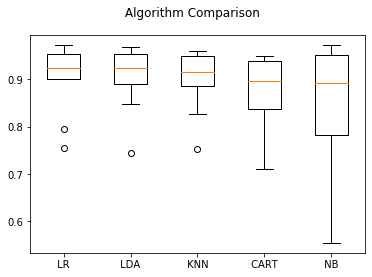

In [301]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# split data into X and y
X = features_columns_df.iloc[:,0:19]
Y = features_columns_df.iloc[:,20]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression())) #逻辑回归
models.append(( ' LDA ' , LinearDiscriminantAnalysis())) #线性判别分析
models.append(( ' KNN ' , KNeighborsClassifier())) #K近邻
models.append(( ' CART ' , DecisionTreeClassifier()))#决策树
models.append(( ' NB ' , GaussianNB()))#高斯分布的朴素贝叶斯
#models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    #十折交叉验证
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X.astype('int'), Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

从这个结论中可以看出线性判别分析的效果比较好。（LDA）

### 原数据量过大，在这里我们在bank-additional上（小样本）训练测试SVM

In [253]:
import pandas as pd
input_data_path = "C:/Users/安雅沛/Desktop/bank-additional/bank-additional/bank-additional.csv"
small_data = pd.read_csv(input_data_path, sep=';')#以分号为间隔

In [254]:
small_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [304]:
#编码分类数据
for col in small_data.columns:
    if small_data[col].dtype==object:
           small_data[col]=small_data[col].astype('category')
           small_data[col]=small_data[col].cat.codes

In [305]:
small_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

 LR : 0.911630 (0.004732)
 LDA : 0.909688 (0.005807)
 KNN : 0.899490 (0.011078)
 CART : 0.885893 (0.009106)
 NB : 0.850693 (0.014154)


D:\University\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\University\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

 SVM : 0.890269 (0.015121)


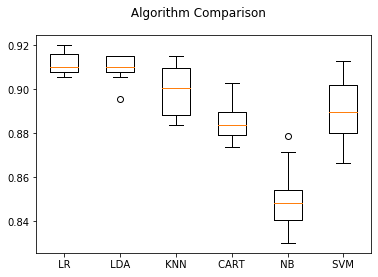

In [306]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# split data into X and y
X = small_data.iloc[:,0:19]
Y = small_data.iloc[:,20]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

可以看出SVM花费时间较长，而且结果也不比前几个好。